In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

import category_encoders as ce

In [20]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('train shape', train.shape)
print('test shape' , test.shape)
train

train shape (207, 12)
test shape (40, 11)


,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4
204,2014-9-26,45,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,キャリアアップ支援セミナー,NaN,晴れ,--,27.1
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6


## 仮置 いろいろ関数

In [21]:


# category_encoding関数
def encoding_func(df, encoding_col_name_list):
    def which_col_is_object_func(df):
        # 列がobjectを抽出してリストに
        keys = list(df.dtypes.loc[df.dtypes == 'object'].index)
        # 辞書化
        values = list(range(len(object_list)))
        object_dic = dict(zip(keys, values))
        print(object_dic)
    
    
    # カテゴリエンコーダーする
    ce_oe = ce.OrdinalEncoder(cols = encoding_col_name_list, handle_unknown = 'impute')
    df = ce_oe.fit_transform(df)

    # カテゴリ番号の確認
    
    for i in range(len(encoding_col_name_list)):
        print(pd.DataFrame(ce_oe.category_mapping[i]))
        print()
    return df
# trainとtestの識別列を追加
train['train_flg'] = True
test['train_flg'] = False



# 前処理

In [23]:
# trainとtestの識別列を追加
train['train_flg'] = True
test['train_flg'] = False

# データの結合
all_data = pd.concat([train, test], axis = 0)


### 作った関数を使って前処理していく

# 各種データの変換
all_data['datetime'] = pd.to_datetime(all_data['datetime'])

# encoding
encoding_col_name_list = ['week',
                         'remarks',
                         'event',
                         'weather']

all_data = encoding_func(all_data, encoding_col_name_list)

# train と testにもどす。
df_train = all_data.loc[all_data['train_flg'] == True]
df_test = all_data.loc[all_data['train_flg'] == False]

/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


      col  mapping data_type
月    week        1    object
火    week        2    object
水    week        3    object
木    week        4    object
金    week        5    object
NaN  week       -2    object

                              col  mapping data_type
NaN                       remarks        1    object
鶏のレモンペッパー焼（50食）、カレー（42食）  remarks        2    object
酢豚（28食）、カレー（85食）          remarks        3    object
お楽しみメニュー                  remarks        4    object
料理長のこだわりメニュー              remarks        5    object
手作りの味                     remarks        6    object
スペシャルメニュー（800円）           remarks        7    object
近隣に飲食店複合ビルオープン            remarks        8    object

                 col  mapping data_type
NaN            event        1    object
ママの会           event        2    object
キャリアアップ支援セミナー  event        3    object

         col  mapping data_type
快晴   weather        1    object
曇    weather        2    object
晴れ   weather        3    object
薄曇   weather        4    obje

# ECA

In [24]:
df_train['name'].unique(), len(df_train['name'])

(array(['厚切りイカフライ', '手作りヒレカツ', '白身魚唐揚げ野菜あん', '若鶏ピリ辛焼', 'ビッグメンチカツ', '鶏の唐揚',
        '豚のスタミナ炒め', 'ボローニャ風カツ', 'ハンバーグ', 'タルタルinソーセージカツ', 'マーボ豆腐',
        '厚揚げ豚生姜炒め', 'クリームチーズ入りメンチ', '鶏のカッシュナッツ炒め', '手作りロースカツ',
        'ハンバーグデミソース', 'やわらかロースのサムジョン', '五目御飯', '肉じゃが', 'タンドリーチキン',
        'カキフライタルタル', '回鍋肉', 'ポーク味噌焼き', '鶏の唐揚げ甘酢あん', 'さっくりメンチカツ',
        '手ごね風ハンバーグ', '酢豚', 'カレー入りソーセージカツ', '豚肉の生姜焼', '鶏チリソース',
        '鶏の照り焼きマスタード', 'さんま辛味焼', 'カレイ唐揚げ野菜あんかけ', 'ジューシーメンチカツ', 'サバ焼味噌掛け',
        '手作りひれかつとカレー', '鶏のレモンペッパー焼orカレー', 'チンジャオロース', '海老フライタルタル',
        'チーズ入りメンチカツ', '鶏の唐揚げ', 'メダイ照り焼', 'ハンバーグカレーソース', 'さわら焼味噌掛け',
        '鶏のピリ辛焼き', 'ホタテクリ―ムシチュー', '鶏の唐揚げおろしソース', 'ますのマスタードソース', 'ロース甘味噌焼き',
        '海老フライとホタテ串カツ', 'ハンバーグ和風きのこソース', '酢豚orカレー', 'ポークハヤシ',
        '白身魚唐揚げ野菜あんかけ', '手作りひれかつ', 'メンチカツ', 'チキンクリームシチュー', '海老クリーミ―クノーデル',
        'ビーフカレー', 'カレイ野菜あんかけ', 'チーズ入りハンバーグ', '越冬キャベツのメンチカツ', '鶏の親子煮',
        '肉団子クリームシチュー', 'キーマカレー', '青椒肉絲', '和風ソースハンバーグ', '青梗菜牛肉炒め',
        '肉団子のシチュー', 'チキンカレー', 'ビーフトマト煮', '

In [25]:
df_train.groupby(['soldout']).count()

,datetime,y,week,name,kcal,remarks,event,payday,weather,precipitation,temperature,train_flg
soldout,,,,,,,,,,,,
0,114,114,114,114,88,114,114,9,114,114,114,114
1,93,93,93,93,78,93,93,1,93,93,93,93


### 販売個数が多い順で、売り切れたもの
- 販売個数が減少傾向があるので、販売個数が多い順でみちゃうと定量的に見れていないのでは?  

  直近○○日以内の平均、標準偏差と比較して多いかどうか で考えたほうがよさそう

In [26]:
df_train.sort_values(by = 'y', ascending = False).loc[df_train['soldout'] == 1].head(20)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,train_flg
15,2013-12-09,165.0,1,1,ハンバーグデミソース,NaN,1,1,NaN,2,--,9.1,True
11,2013-12-03,153.0,2,1,厚揚げ豚生姜炒め,NaN,1,1,NaN,1,--,13.9,True
12,2013-12-04,151.0,3,1,クリームチーズ入りメンチ,NaN,1,1,NaN,3,--,13.5,True
10,2013-12-02,151.0,1,1,マーボ豆腐,NaN,1,1,NaN,1,--,13.8,True
22,2013-12-18,145.0,3,1,回鍋肉,NaN,1,1,NaN,2,--,7.8,True
7,2013-11-27,140.0,3,1,ボローニャ風カツ,NaN,1,1,NaN,3,--,14.7,True
46,2014-02-03,139.0,1,1,ハンバーグカレーソース,445.0,1,1,NaN,3,--,15.9,True
55,2014-02-17,137.0,1,1,チンジャオロース,416.0,1,1,NaN,3,--,11.6,True
5,2013-11-25,135.0,1,1,鶏の唐揚,NaN,1,1,NaN,2,--,14.6,True
24,2013-12-20,134.0,5,1,鶏の唐揚げ甘酢あん,NaN,1,1,NaN,2,--,8.4,True


In [27]:
days = {1:'月', 2:'火', 3:'水', 4:'木', 5:'金', 6:'土', 7:'日'}

# どの曜日が一番売れてるか
for key, value in days.items():
    print(len(df_train.sort_values(by = 'y', ascending = False).loc[(df_train['soldout'] == 1) & (df_train['week'] == value)]))

0
0
0
0
0
0
0


In [28]:
days = {1:'月', 2:'火', 3:'水', 4:'木', 5:'金', 6:'土', 7:'日'}

# どの曜日が一番売れてるか
for key, value in days.items():
    print(len(df_train.sort_values(by = 'y', ascending = False).loc[(df_train['soldout'] == 1) & (df_train['week'] == value)]))

0
0
0
0
0
0
0


## 販売量の推移
突発的に売れるメニューもあるが、全体的には現象傾向

<AxesSubplot:xlabel='datetime', ylabel='y'>

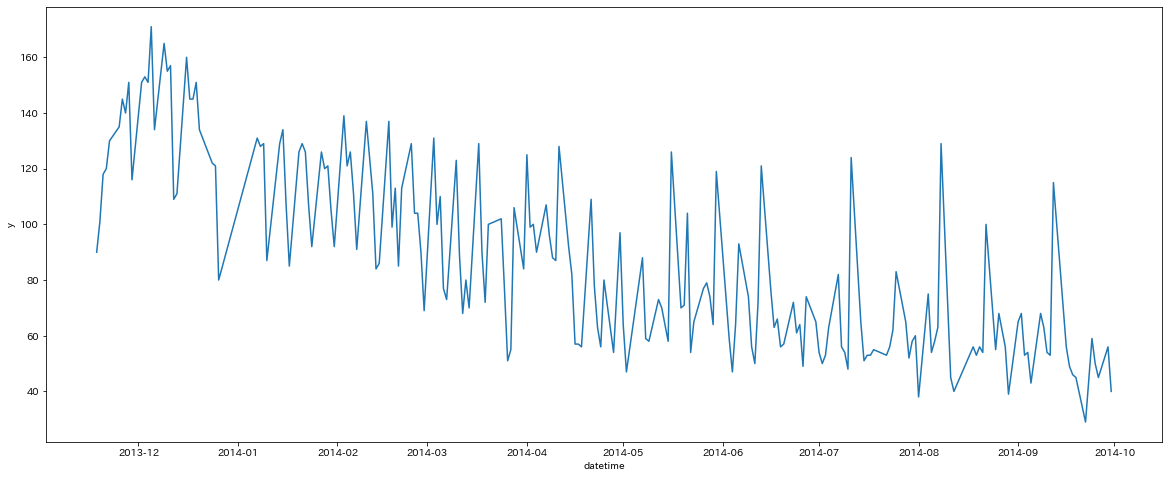

In [29]:
plt.figure(figsize = (20,8))
sns.lineplot(x = 'datetime', y = 'y', data = df_train)

<ipython-input-30-671a9301b5d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['YM'] = df_train['datetime'].dt.strftime('%Y%m')


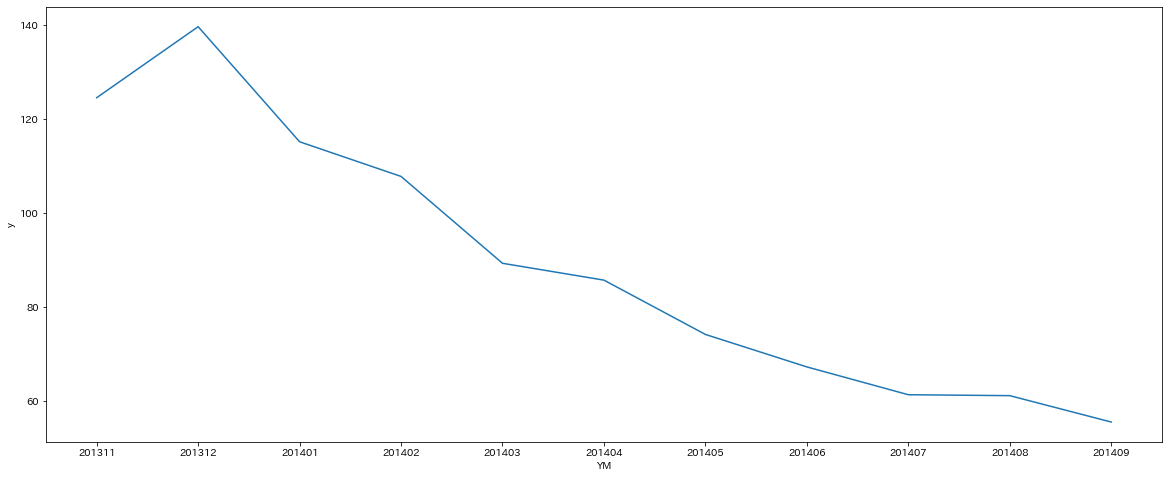

In [30]:
# 年月列を追加
df_train['YM'] = df_train['datetime'].dt.strftime('%Y%m')

# 月ごとの平均
df_train_ym = df_train.groupby(df_train['YM'], as_index = False).mean()

plt.figure(figsize = (20,8))
sns.lineplot(x = 'YM', y = 'y', data = df_train_ym)
plt.show()


### 移動平均等

<ipython-input-31-4cdc0d05c4cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y_rolling_mean5'] = df_train['y'].rolling(5).mean()


<AxesSubplot:xlabel='datetime', ylabel='y_rolling_mean5'>

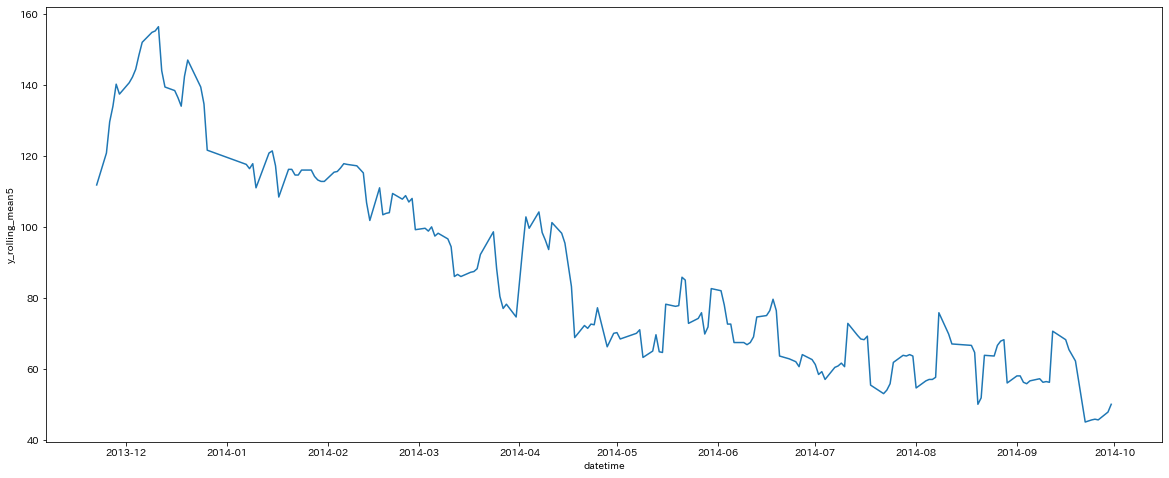

In [31]:
df_train['y_rolling_mean5'] = df_train['y'].rolling(5).mean()
plt.figure(figsize = (20,8))
sns.lineplot(x = 'datetime', y = 'y_rolling_mean5', data = df_train)

### 変化率、変化量

#### 変化量

In [32]:
y_diff_n = 5
for i in range(1, y_diff_n + 1):
    df_train['y_diff_'+str(i)] = df_train['y'].diff(i)

df_train

<ipython-input-32-5a0812b041a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y_diff_'+str(i)] = df_train['y'].diff(i)


,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,train_flg,YM,y_rolling_mean5,y_diff_1,y_diff_2,y_diff_3,y_diff_4,y_diff_5
0,2013-11-18,90.0,1,0,厚切りイカフライ,NaN,1,1,NaN,1,--,19.8,True,201311,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-11-19,101.0,2,1,手作りヒレカツ,NaN,1,1,NaN,1,--,17.0,True,201311,NaN,11.0,NaN,NaN,NaN,NaN
2,2013-11-20,118.0,3,0,白身魚唐揚げ野菜あん,NaN,1,1,NaN,1,--,15.5,True,201311,NaN,17.0,28.0,NaN,NaN,NaN
3,2013-11-21,120.0,4,1,若鶏ピリ辛焼,NaN,1,1,NaN,1,--,15.2,True,201311,NaN,2.0,19.0,30.0,NaN,NaN
4,2013-11-22,130.0,5,1,ビッグメンチカツ,NaN,1,1,NaN,1,--,16.1,True,201311,111.8,10.0,12.0,29.0,40.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2014-09-24,59.0,3,1,白身魚のマスタード焼き,408.0,1,1,NaN,2,0,24.8,True,201409,45.6,30.0,14.0,13.0,10.0,3.0
203,2014-09-25,50.0,4,0,牛カルビ焼き肉,394.0,1,1,NaN,2,0,25.4,True,201409,45.8,-9.0,21.0,5.0,4.0,1.0
204,2014-09-26,45.0,5,0,ランチビュッフェ,NaN,7,3,NaN,3,--,27.1,True,201409,45.6,-5.0,-14.0,16.0,0.0,-1.0
205,2014-09-29,56.0,1,1,豚肉と玉子の炒め,404.0,1,1,NaN,1,--,26.6,True,201409,47.8,11.0,6.0,-3.0,27.0,11.0
